In [2]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import re
import sys
sys.path.insert(1, '/Users/emmagurcan/Documents/France/ENS/M1/stageM1/analysis')
from functions_MSM74 import *

In [3]:
raw_ctd = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw_ctd.nc"
raw_ctd2 = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw_ctd2.nc"
nclonlat = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74_lonlat.nc"
readcp = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74-VMADCP_allfiles/msm_074_1_vmadcp_75khz_01.nc"
rep = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74_CTD.tab"
lon_lat_event =  "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/clean_lonlatev.nc"

In [4]:
ds_lonlat = nc.Dataset(nclonlat)
ds_adcp = nc.Dataset(readcp)
ds_ctd = nc.Dataset(raw_ctd)
# ds_ctd2 = nc.Dataset(raw_ctd2)
lonlatev = nc.Dataset(lon_lat_event)
# ds_ctd.close()

In [5]:
ds_lonlat = nc.Dataset(nclonlat)
ds_adcp = nc.Dataset(readcp)

In [6]:
ds_adcp.variables.keys()

dict_keys(['DEPTH', 'DEPTH_QC', 'TIME', 'TIME_QC', 'LATITUDE', 'LATITUDE_QC', 'LONGITUDE', 'LONGITUDE_QC', 'UCUR', 'UCUR_QC', 'VCUR', 'VCUR_QC', 'PINGS_PER_ENSEMBLE', 'PINGS_PER_ENSEMBLE_QC', 'ECHO_AMPLITUDE', 'ECHO_AMPLITUDE_QC', 'PERCENT_GOOD', 'PERCENT_GOOD_QC'])

In [7]:
lats = lonlatev['Latitude']
lons = lonlatev['Longitude']

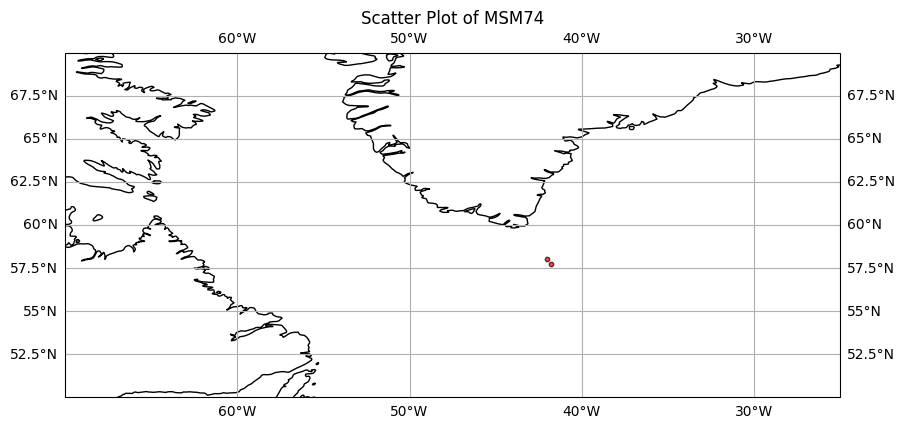

In [9]:
plot_coords(lons[73:75], lats[73:75])

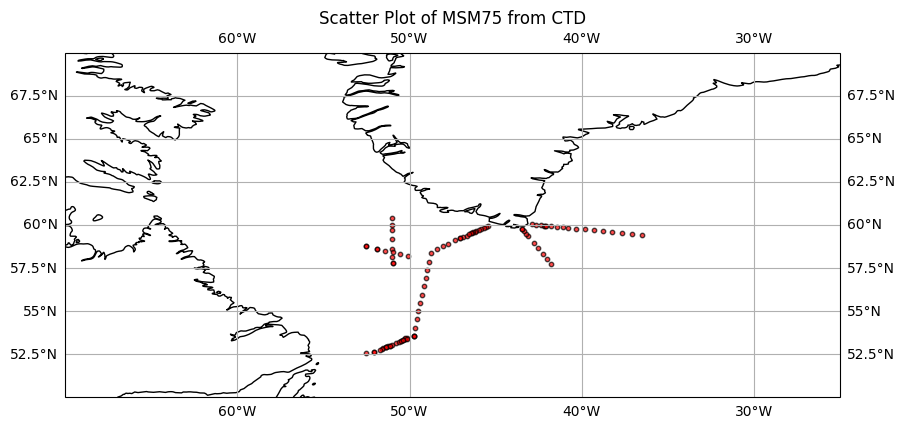

In [12]:
# Remove NaN values if any (optional)
# lats = ds_ctd['Lat']
valid_indices = ~np.isnan(lats) & ~np.isnan(lons)
lats_clean = lats[valid_indices]
lons_clean = lons[valid_indices]

# Create a map using Cartopy with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map boundaries (focus on the Labrador Sea)
ax.set_extent([-70, -25, 50, 70], crs=ccrs.PlateCarree())  # Lon min, Lon max, Lat min, Lat max

# Add coastlines and gridlines for reference
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

# lons_clean = lons_clean[31:35]
# lats_clean = lats_clean[31:43]
# Plot the scatter points using the transform argument
scatter = ax.scatter(lons_clean, lats_clean, color='red', s=10, edgecolor='black', alpha=0.7, transform=ccrs.PlateCarree())

# Add title
ax.set_title('Scatter Plot of MSM75 from CTD')

# Show the plot
plt.show()


In [27]:
print(np.unique(ds_ctd['Event']))

['MSM74_1-1' 'MSM74_100-1' 'MSM74_101-1' 'MSM74_102-1' 'MSM74_103-1'
 'MSM74_104-1' 'MSM74_105-1' 'MSM74_106-1' 'MSM74_107-1' 'MSM74_108-1'
 'MSM74_109-1' 'MSM74_11-1' 'MSM74_11-2' 'MSM74_110-1' 'MSM74_111-1'
 'MSM74_112-1' 'MSM74_113-1' 'MSM74_117-2' 'MSM74_118-1' 'MSM74_119-1'
 'MSM74_12-1' 'MSM74_120-1' 'MSM74_121-1' 'MSM74_123-2' 'MSM74_124-1'
 'MSM74_124-2' 'MSM74_125-1' 'MSM74_126-1' 'MSM74_127-1' 'MSM74_130-1'
 'MSM74_131-1' 'MSM74_132-1' 'MSM74_14-1' 'MSM74_17-1' 'MSM74_18-1'
 'MSM74_19-1' 'MSM74_20-1' 'MSM74_21-1' 'MSM74_23-1' 'MSM74_23-2'
 'MSM74_24-1' 'MSM74_25-1' 'MSM74_26-1' 'MSM74_26-2' 'MSM74_27-1'
 'MSM74_3-1' 'MSM74_31-1' 'MSM74_32-1' 'MSM74_33-1' 'MSM74_36-1'
 'MSM74_37-1' 'MSM74_38-1' 'MSM74_38-2' 'MSM74_39-1' 'MSM74_4-1'
 'MSM74_40-1' 'MSM74_41-2' 'MSM74_44-1' 'MSM74_45-1' 'MSM74_45-2'
 'MSM74_45-3' 'MSM74_47-1' 'MSM74_48-1' 'MSM74_49-1' 'MSM74_5-1'
 'MSM74_50-1' 'MSM74_51-1' 'MSM74_52-1' 'MSM74_52-2' 'MSM74_53-1'
 'MSM74_54-1' 'MSM74_55-1' 'MSM74_56-1' 'MSM74_57-1'

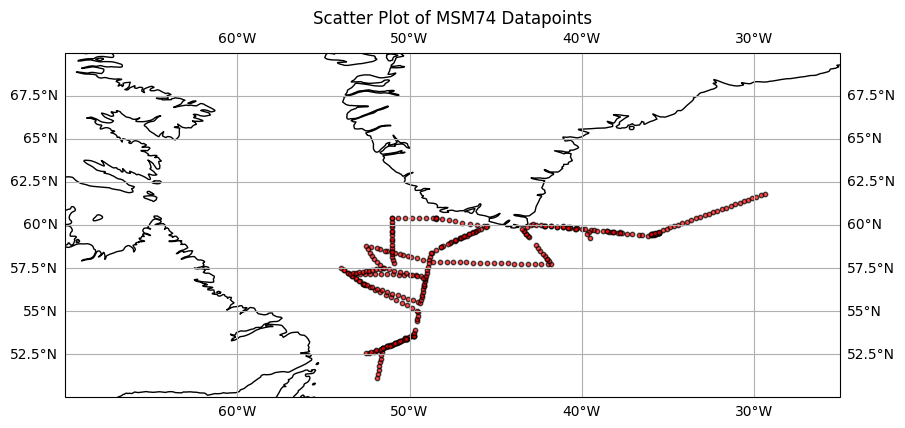

In [62]:
# Remove NaN values if any (optional)
# lats = ds_ctd['Lat']
lats = ds_lonlat['Latitude']
lons = ds_lonlat['Longitude']
valid_indices = ~np.isnan(lats) & ~np.isnan(lons)
lats_clean = lats[valid_indices]
lons_clean = lons[valid_indices]

# Create a map using Cartopy with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map boundaries (focus on the Labrador Sea)
ax.set_extent([-70, -25, 50, 70], crs=ccrs.PlateCarree())  # Lon min, Lon max, Lat min, Lat max

# Add coastlines and gridlines for reference
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

# lons_clean = lons_clean[]
# lats_clean = lats_clean[320:]
# Plot the scatter points using the transform argument
scatter = ax.scatter(lons_clean, lats_clean, color='red', s=10, edgecolor='black', alpha=0.7, transform=ccrs.PlateCarree())

# Add title
ax.set_title('Scatter Plot of MSM74 Datapoints')

# Show the plot
plt.show()


In [26]:
ds_lonlat.variables.keys()

dict_keys(['Latitude', 'Longitude', 'time'])

In [8]:
rep = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74_CTD.tab"

In [9]:
df = pd.read_csv(rep, delimiter="\t", skiprows=11, nrows=114)

In [10]:
df

,Unnamed: 0,"MINIMUM DEPTH, water: 1.98 m * MAXIMUM DEPTH, water: 3737.82 m"
0,Event(s):,MSM74_1-1 * LATITUDE: 47.546640 * LONGITUDE: -...
1,NaN,MSM74_3-1 * LATITUDE: 52.840230 * LONGITUDE: -...
2,NaN,MSM74_4-1 * LATITUDE: 52.879030 * LONGITUDE: -...
3,NaN,MSM74_5-1 * LATITUDE: 52.942130 * LONGITUDE: -...
4,NaN,MSM74_6-1 * LATITUDE: 52.986800 * LONGITUDE: -...
...,...,...
109,NaN,MSM74_125-1 * LATITUDE: 59.629210 * LONGITUDE:...
110,NaN,MSM74_126-1 * LATITUDE: 59.570890 * LONGITUDE:...
111,NaN,MSM74_127-1 * LATITUDE: 59.508540 * LONGITUDE:...
112,NaN,MSM74_130-1 * LATITUDE: 59.445930 * LONGITUDE:...


In [11]:
# Load the data from the tab-delimited file
df = pd.read_csv(rep, delimiter="\t", skiprows=11, nrows=114)  # Ensure `rep` is defined

# Extract event name, latitude, and longitude using regex
def extract_lat_lon(event_str):
    match = re.search(r"(MSM74_\d+-\d+) \* LATITUDE: ([\d.-]+) \* LONGITUDE: ([\d.-]+)", str(event_str))
    if match:
        return match.group(1), float(match.group(2)), float(match.group(3))
    return None, None, None

df[["Event", "Latitude", "Longitude"]] = df.iloc[:, -1].apply(lambda x: pd.Series(extract_lat_lon(x)))  

In [12]:
df['Latitude']

0      47.54664
1      52.84023
2      52.87903
3      52.94213
4      52.98680
         ...   
109    59.62921
110    59.57089
111    59.50854
112    59.44593
113    59.38389
Name: Latitude, Length: 114, dtype: float64

In [9]:
import pandas as pd
import xarray as xr
import re

# Load the NetCDF files
# ds_ctd = xr.open_dataset("ds_ctd.nc")
# ds_lonlat = xr.open_dataset("ds_lonlat.nc")  # Assuming it contains reference longitude & latitude

# Load the data from the tab-delimited file
df = pd.read_csv(rep, delimiter="\t", skiprows=12, nrows=50)  # Ensure `rep` is defined

# Extract event name, latitude, and longitude using regex
def extract_lat_lon(event_str):
    match = re.search(r"(MSM74_\d+-\d+) \* LATITUDE: ([\d.-]+) \* LONGITUDE: ([\d.-]+)", str(event_str))
    if match:
        return match.group(1), float(match.group(2)), float(match.group(3))
    return None, None, None

df[["Event", "Latitude", "Longitude"]] = df.iloc[:, -1].apply(lambda x: pd.Series(extract_lat_lon(x)))  
# Assuming the last column contains the event details

# Check if extraction worked correctly
if df["Event"].isna().all():
    raise ValueError("No valid events were extracted. Check the column structure.")

# Define section index ranges
sections = {
    1: (0, 10), 2: (10, 59), 3: (59, 65), 4: (65, 83), 5: (83, 89), 6: (89, 103),
    7: (103, 114), 8: (114, 128), 9: (128, 137), 10: (137, 154), 11: (154, 161),
    12: (161, 172), 13: (172, 201), 14: (201, 216), 15: (216, 231), 16: (231, 236),
    17: (236, 255), 18: (255, 270), 19: (271, 298), 20: (298, 320), 21: (320, float('inf'))
}

# Assign section based on index
def get_section(index):
    for sec, (start, end) in sections.items():
        if start <= index < end:
            return sec
    return None

df["Section"] = df.index.map(get_section)

# Convert to xarray and merge with ds_ctd
event_ds = xr.Dataset(
    {
        "latitude": (["event"], df["Latitude"].values),
        "longitude": (["event"], df["Longitude"].values),
        "section": (["event"], df["Section"].values)
    },
    coords={"event": df["Event"].values}
)
print(type(ds_ctd))
print(type(event_ds))

# Merge into ds_ctd
merged_ds = xr.merge([ds_ctd, event_ds])

# Show the modified dataset
print(merged_ds)


<class 'netCDF4._netCDF4.Dataset'>
<class 'xarray.core.dataset.Dataset'>


TypeError: objects must be an iterable containing only Dataset(s), DataArray(s), and dictionaries.

In [12]:
merged_ds.to_netcdf("ctd_lonlat_secs.nc")

In [13]:
ctd_merged = nc.Dataset("ctd_lonlat_secs.nc")

In [ ]:
sections = ctd_merged['section']

In [ ]:
import numpy as np

unique_sections = np.unique(ctd_merged['section'])
print(unique_sections)
